##### **About the dataset**

 - the datasets provided include the players data for the Career FIFA 20.
 
The dataset contains:
 - 104 attributes are present.
 - URL of the player.
 - Player positions, with the role in the club and in the national team.
 - Player attributes with statistics as Attacking, Skills, Defense, Mentality, GK Skills, etc.
 - Player personal data like Nationality, Club, DateOfBirth, Wage, Salary, etc.

##### **Problem Statement:**
Using clustering algorithms to categorize similar players using their traits and their different skills in the fields

## **KMEANS** 

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings('ignore')
#Display propertice
pd.set_option('max_columns', 104)
pd.set_option('max_rows',104)

In [ ]:
#importing data
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
df.shape

(18278, 104)

In [ ]:
df.dtypes #data type of each columns

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

In [ ]:
df.info() #concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


Our dataset consists of information of about 18278 players across 104 variables, and it has three different types of data types - 16 float variable, 45 integer and 43 categorical

In [ ]:
#number of unique elements in dataset -  unique observations over the index axis
df.nunique()

sofifa_id                     18278
player_url                    18278
short_name                    17354
long_name                     18218
age                              27
dob                            6142
height_cm                        49
weight_kg                        56
nationality                     162
club                            698
overall                          47
potential                        47
value_eur                       214
wage_eur                        141
player_positions                643
preferred_foot                    2
international_reputation          5
weak_foot                         5
skill_moves                       5
work_rate                         9
body_type                        10
real_face                         2
release_clause_eur             1224
player_tags                      83
team_position                    29
team_jersey_number               99
loaned_from                     316
joined                      

Percentage of missing Values Sorted

In [ ]:
missing_values = df.isnull().sum() / len(df)        # the missing percentage sorted before we apply cleaning methods  
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values


team_position           0.013131
team_jersey_number      0.013131
contract_valid_until    0.013131
joined                  0.070467
release_clause_eur      0.071014
rf                      0.111391
rw                      0.111391
lam                     0.111391
cam                     0.111391
ram                     0.111391
lm                      0.111391
lcm                     0.111391
cm                      0.111391
rcm                     0.111391
lwb                     0.111391
cf                      0.111391
ldm                     0.111391
cdm                     0.111391
rdm                     0.111391
rwb                     0.111391
lb                      0.111391
lcb                     0.111391
cb                      0.111391
rm                      0.111391
lf                      0.111391
st                      0.111391
rs                      0.111391
pace                    0.111391
shooting                0.111391
passing                 0.111391
dribbling 

In [ ]:
df.isnull().any()

sofifa_id                     False
player_url                    False
short_name                    False
long_name                     False
age                           False
dob                           False
height_cm                     False
weight_kg                     False
nationality                   False
club                          False
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
player_positions              False
preferred_foot                False
international_reputation      False
weak_foot                     False
skill_moves                   False
work_rate                     False
body_type                     False
real_face                     False
release_clause_eur             True
player_tags                    True
team_position                  True
team_jersey_number             True
loaned_from                    True
joined                      

Dropping of the columns that have more than fifty percentage data as NAN values

In [ ]:
#drop columns that have  more than 50% data as null
cols_to_delete = df.columns[df.isnull().sum()/len(df) > .50]
print(cols_to_delete)
df=df.drop(cols_to_delete, axis=1)

pd.set_option("display.max_columns", None) # display all columns
df.head(5)

Index(['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits'],
      dtype='object')


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


Dropping of columns that would not be required for categorizing players on their traits and features


In [ ]:
#drop columns that would NOT be required for categorizing players on their traits and features
# Dropping data of goalkeeper as a team has few goalkeepers thereby resulting in blank or negligible data

df = df.drop(columns = ['sofifa_id', 'player_url', 'long_name', 'dob', 'value_eur','real_face', 'release_clause_eur', 'team_position', 'team_jersey_number','joined'], axis=1)
pd.set_option("display.max_columns", None) # display all columns

df.head(5)


,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,125000,GK,Right,3,3,1,Medium/Medium,Normal,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


identifying and removing duplicate column Some of the columns like eg ls, st, rs were duplicated. In football, they basically stand for the same position 'forward'. Hence such columsn were eliminated.

In [ ]:
def getDuplicateColumns(df):
    duplicateColumnNames=set()
    for x in range (df.shape[1]):
        col=df.iloc[:, x]
        for y in range (x+1, df.shape[1]):
            otherCol=df.iloc[:,y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list (duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(df)
for col in duplicateColumnNames:
    print('Column name : ', col)
#16 columns are duplicates, remaining 8 columns 

Column name :  st
Column name :  rm
Column name :  cb
Column name :  rcb
Column name :  cm
Column name :  rf
Column name :  rw
Column name :  rdm
Column name :  rwb
Column name :  rcm
Column name :  rb
Column name :  cdm
Column name :  rs
Column name :  cf
Column name :  ram
Column name :  cam


In [ ]:
df.describe().columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeepin

The Heat map shows the correlation between the variables

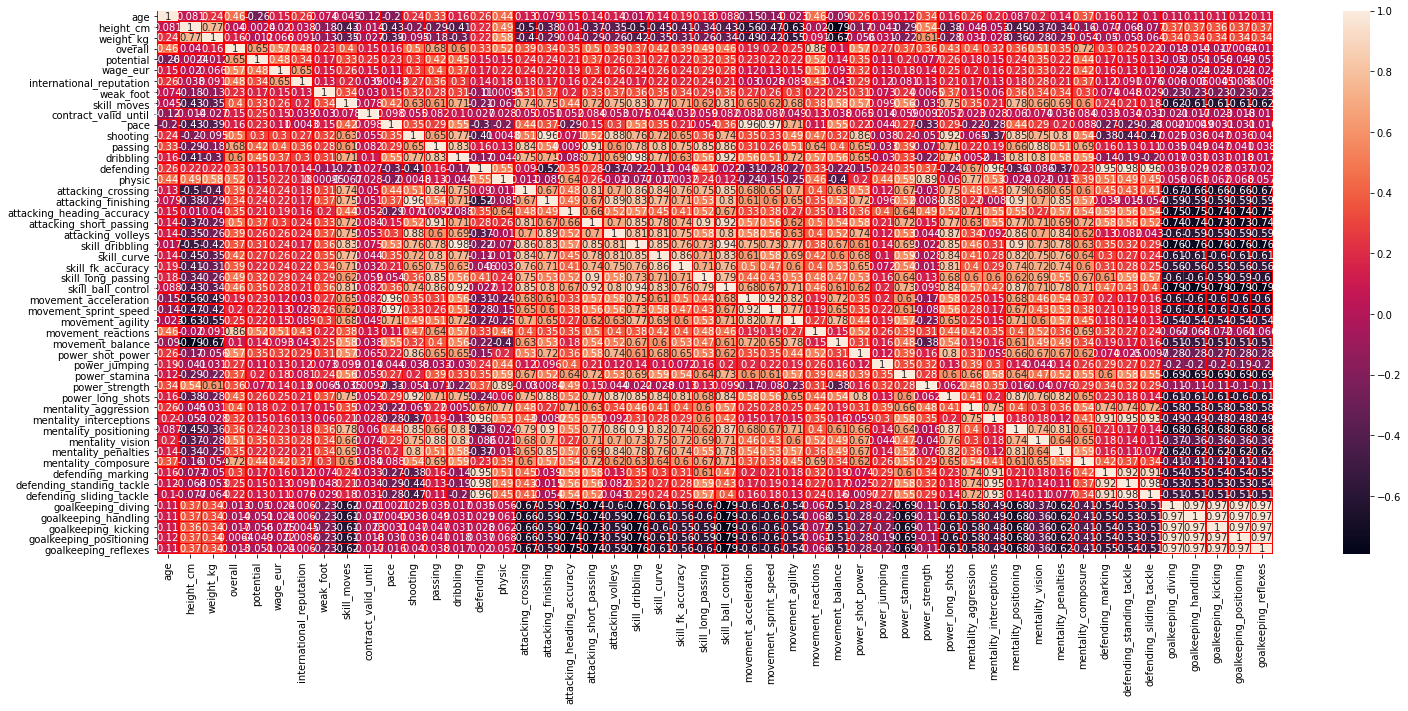

In [ ]:
# Plotting the Heatmap of the columns using correlation matrix
#f,ax = plt.subplots(figsize=(25, 15))
#sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red", fmt= '.1f',ax=ax)
#plt.show()
corr = df.corr()
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="red")

plt.show()

#sns.heatmap(corr, cmap = 'Blues')

Number of players for each categorical variables

In [ ]:
names = df.short_name.tolist() # saving names for later https://www.geeksforgeeks.org/python-pandas-series-tolist/

df = df.drop(['short_name'], axis = 1) # drop the short_name column

In [ ]:
#numeric_data = df.select_dtypes(include=[np.number])
#categorical_data = df.select_dtypes(exclude=[np.number])

#numeric_data.shape




In [ ]:
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
nationality                      0
club                             0
overall                          0
potential                        0
wage_eur                         0
player_positions                 0
preferred_foot                   0
international_reputation         0
weak_foot                        0
skill_moves                      0
work_rate                        0
body_type                        0
contract_valid_until             0
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve         

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'wage_eur',
       'international_reputation', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [ ]:
df.head()

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,565000,5,4,4,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,405000,5,4,5,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,290000,5,5,5,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,125000,3,3,1,2023.0,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,470000,4,4,4,2024.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
df.shape

(18278, 50)

Distribution of physical attributes

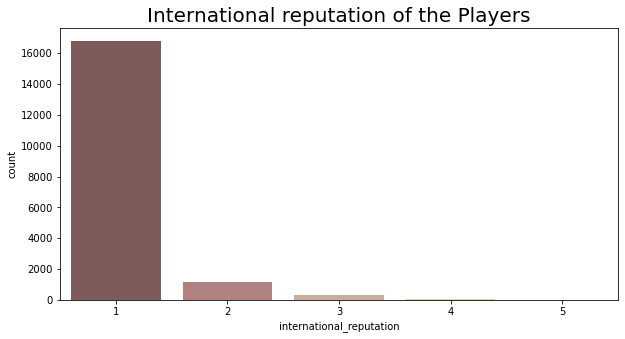

In [ ]:
 #comparison of international reputation over the different players
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(df['international_reputation'], palette = 'pink')
plt.title('International reputation of the Players', fontsize = 20)
plt.show()

In [ ]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.615385,0.285714,0.366667,1.000000,0.978261,1.000000,1.00,0.75,0.75,0.285714,0.875000,0.987179,1.000000,1.000000,0.320000,0.619048,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.716814,1.00,0.75,1.00,0.428571,0.916667,1.000000,0.852941,0.904110,0.266667,0.809524,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,0.513274,1.00,1.00,1.00,0.428571,0.930556,0.897436,0.926471,0.986301,0.226667,0.492063,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.221239,0.50,0.50,0.00,0.571429,0.606957,0.478183,0.488732,0.541529,0.487380,0.601217,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.831858,0.75,0.75,0.75,0.714286,0.930556,0.871795,0.911765,0.972603,0.266667,0.619048,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923


In [ ]:
df.shape

(18278, 50)

We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a crisp 0.0 and 1.0 respectively.

Principal component analysis
As fifa20 dataset is a high dimesional dataset with various traits/variables on which player can be grouped into clusters, we used a next step to reduce the dimensionality of this dataset before running the K-means

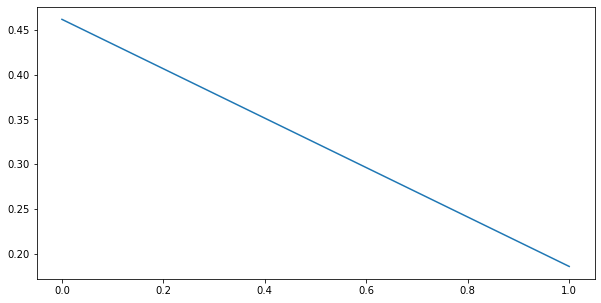

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))



plt.plot(pca.explained_variance_ratio_)

In [ ]:
df = df.iloc[:,0:50]

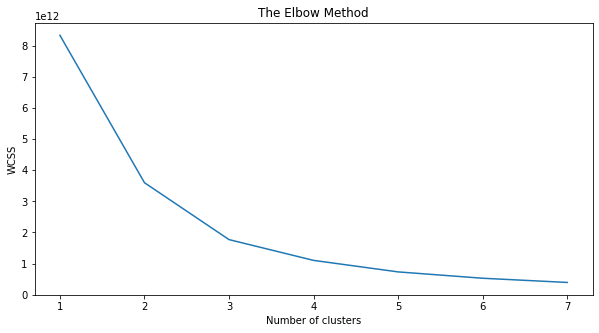

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss=[] #with cluster sum of squares
for i in range (1,8):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/

Cluster between 3 to 7 look optimum. We shall validate these two cluster through silhoutte score

In [ ]:
#Fitting KMeans to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42)     #deduced from the elbow method graph
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[1 1 1 ... 0 0 0]


In [ ]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=3)   #deduced from the elbow method graph

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

print(centroid)
#print(clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


# Calculate Silhoutte Score
#
score = silhouette_score(reduced, labels, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)



[[-0.4068118  -0.47373221]
 [-0.12639733  0.51195102]
 [ 2.09542159 -0.25857304]]
Silhouetter Score: 0.478


Make a new data frame by adding players' names and their cluster

In [ ]:
reduced['cluster'] = clusters
reduced['short_name'] = names
reduced.columns = ['x', 'y', 'cluster','short_name']
reduced.head()

,x,y,cluster,short_name
0,-1.827169,-1.169856,0,L. Messi
1,-1.699242,-1.064360,0,Cristiano Ronaldo
2,-1.694832,-1.312882,0,Neymar Jr
3,1.875083,-0.283602,2,J. Oblak
4,-1.614299,-1.147999,0,E. Hazard


In [ ]:
#to count how many are in which cluster
count0=0
count1=0
count2=0
count3=0

for i in clusters:
    if i==0:
        count0=count0+1
    elif i==1:
        count1=count1+1
    elif i==2:
        count2=count2+1
    else:
        continue
print("cluster0",count0)
print("cluster1",count1)
print("cluster2",count2)


cluster0 7919
cluster1 8322
cluster2 2037


[-0.4068118  -0.12639733  2.09542159]
[-0.47373221  0.51195102 -0.25857304]


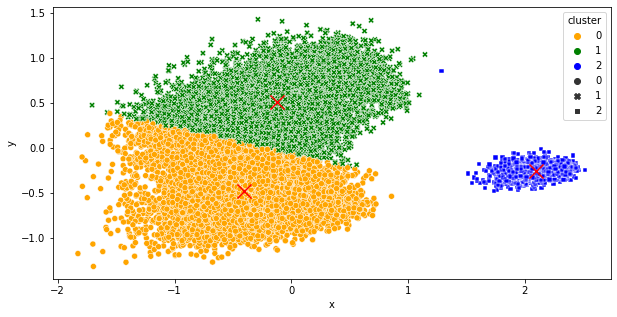

In [ ]:
# Creates a scatter plot
sns.scatterplot(
    x='x', 
    y='y',
    data=reduced, 
    hue='cluster',
    style=kmeans.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])

Improvement Steps:
We can try other steps to further improvise the clustering

## **HIERARCHICAL CLUSTERING**

In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [ ]:
df.head()

,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,565000,5,4,4,2021.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,405000,5,4,5,2022.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,290000,5,5,5,2022.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,125000,3,3,1,2023.0,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,470000,4,4,4,2024.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.615385,0.285714,0.366667,1.000000,0.978261,1.000000,1.00,0.75,0.75,0.285714,0.875000,0.987179,1.000000,1.000000,0.320000,0.619048,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.692308,0.632653,0.550000,0.978261,0.956522,0.716814,1.00,0.75,1.00,0.428571,0.916667,1.000000,0.852941,0.904110,0.266667,0.809524,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.423077,0.387755,0.300000,0.956522,0.934783,0.513274,1.00,1.00,1.00,0.428571,0.930556,0.897436,0.926471,0.986301,0.226667,0.492063,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.384615,0.653061,0.616667,0.934783,0.956522,0.221239,0.50,0.50,0.00,0.571429,0.606957,0.478183,0.488732,0.541529,0.487380,0.601217,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.461538,0.387755,0.400000,0.934783,0.913043,0.831858,0.75,0.75,0.75,0.714286,0.930556,0.871795,0.911765,0.972603,0.266667,0.619048,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923


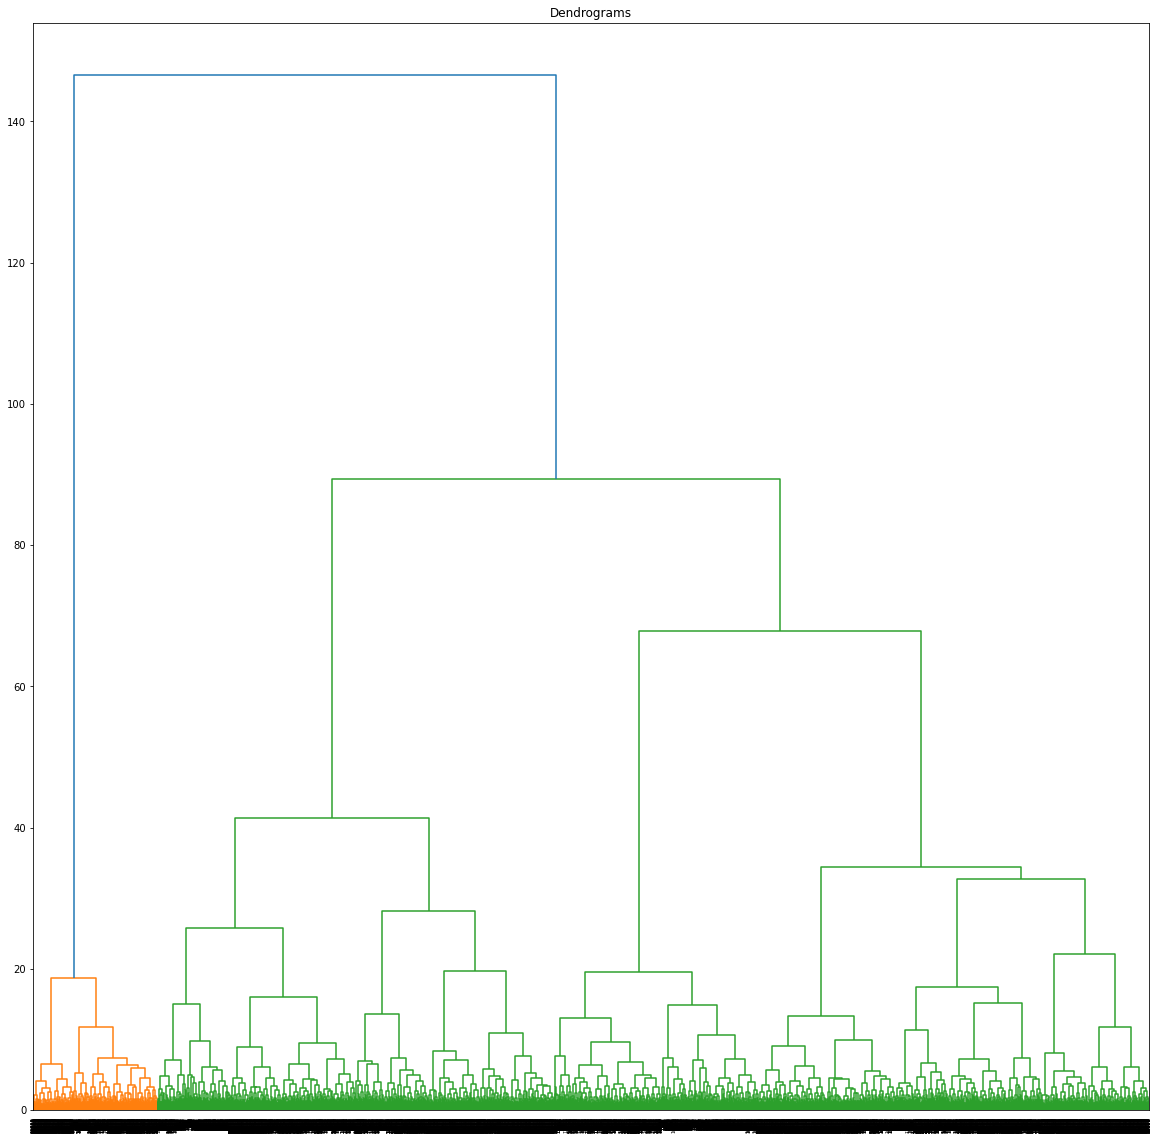

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_norm, method='ward'))

if we draw a horizontal line that passes through longest distance without a horizontal line, we get 4 clusters as shown in the following figure:

The vertical line with maximum distance is the blue line and hence we can decide a threshold of 4 and cut the dendrogram:

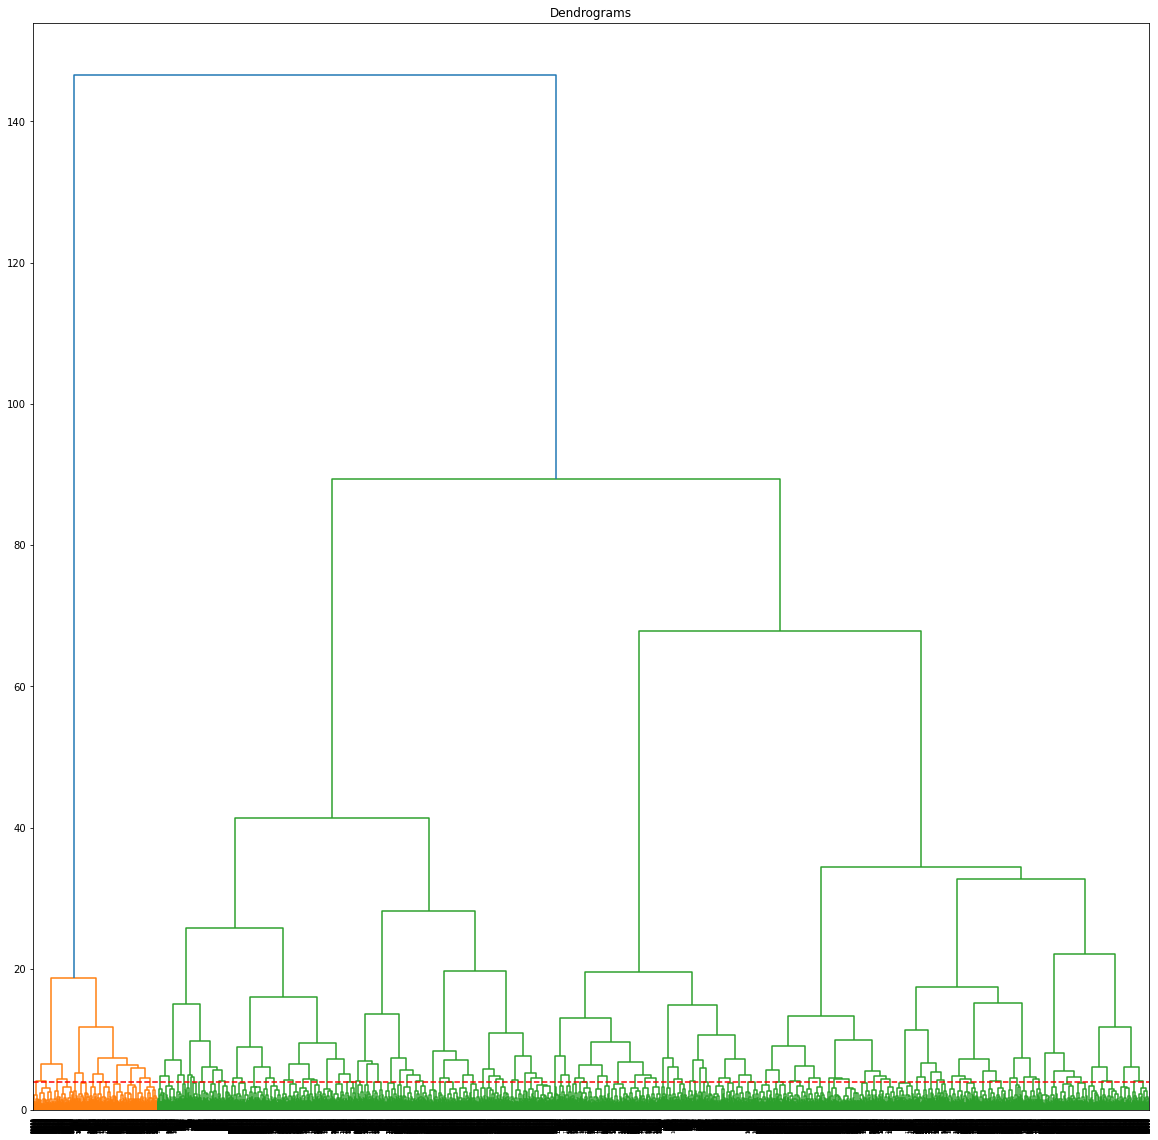

In [ ]:
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_norm, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

Now we know the number of clusters for our dataset, the next step is to group the data points into these four clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

we can see the cluster labels from all of your data points. Since we had four clusters, we have four labels in the output i.e. 0 to 3.

As a final step, let's plot the clusters to see how actually our data has been clustered:

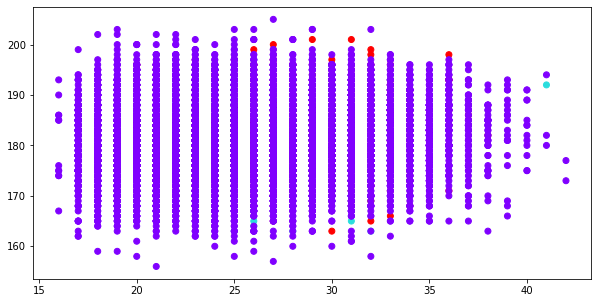

In [ ]:
X_norm = pd.DataFrame(x_scaled)
plt.scatter(x[:,0],x[:,1], c = cluster.labels_, cmap = 'rainbow')

# **DBSCAN**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Fifa20_Final_Project_Files/players_20.csv"
df=pd.read_csv(path)

df.describe
pd.set_option("display.max_columns", None) # display all columns

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,temp
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,01-07-2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,10-07-2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,63+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,03-08-2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,63+2
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,16-07-2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acroba

In [ ]:
df.shape

(18278, 105)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 105 entries, sofifa_id to temp
dtypes: float64(16), int64(45), object(44)
memory usage: 14.6+ MB


Our dataset consists of information of about 18278 players across 104 variables, and it has three different types of data types - 16 float variable, 45 integer and 43 categorical

In [ ]:
pd.options.display.max_rows=104      # have NaN values in dataset
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lcb           2036
cb            2036
rcb           2036
rb            2036
temp             0
Length: 105, dtype: int64

In the dataset, we can see columns have int values while their types is float.
Many NaN values present.


**Data cleaning**
Filling NaN values with respective with Mean

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df['release_clause_eur'] = pd.to_numeric(df['release_clause_eur'],errors='coerce').fillna(0)
df['release_clause_eur'].replace(0,df['release_clause_eur'].mean(),inplace=True)

df['team_jersey_number'] = pd.to_numeric(df['team_jersey_number'],errors='coerce').fillna(0).astype('int64')
df['team_jersey_number'].replace(0,df['team_jersey_number'].mean(),inplace=True)

df['contract_valid_until'] = pd.to_numeric(df['contract_valid_until'],errors='coerce').fillna(0)
df['contract_valid_until'].replace(0,df['contract_valid_until'].median(),inplace=True)

df['nation_jersey_number'] = pd.to_numeric(df['nation_jersey_number'],errors='coerce').fillna(0).astype('int64')
df['nation_jersey_number'].replace(0,df['nation_jersey_number'].mean(),inplace=True)


In [ ]:
for i in df.columns:
    if  df[i].dtype== 'float64':
        print(i)                                  # WE TYPECAST THE FLOAT VALUES TO INTEGERS
        df[i]=df[i].astype('int64')

release_clause_eur
contract_valid_until
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning


In [ ]:
df['player_tags']=df['player_tags'].str.replace('#','')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,temp
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,24-06-1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000,"Dribbler, Distance Shooter, Crosser, FK Specia...",RW,10,NaN,01-07-2004,2021,NaN,12,87,92,92,96,39,66,65,63,61,66,37,63,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,05-02-1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000,"Speedster, Dribbler, Distance Shooter, Acrobat...",LW,7,NaN,10-07-2018,2022,LS,7,90,93,82,89,35,78,65,63,61,66,37,63,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,63+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,05-02-1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000,"Speedster, Dribbler, Playmaker , Crosser, FK ...",CAM,10,NaN,03-08-2017,2022,LW,10,91,85,87,95,32,58,65,63,61,66,37,63,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,63+2
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,07-01-1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000,NaN,GK,13,NaN,16-07-2014,2023,GK,1,67,52,57,62,51,64,87,92,78,89,52,90,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,07-01-1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000,"Speedster, Dribbler, Acrobat",LW,7,NaN,01-07-2019,2024,LF,10,91,83,86,94,35,66,65,63,61,66,37,63,"Beat Offside Trap, Selfish, Finesse S

**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

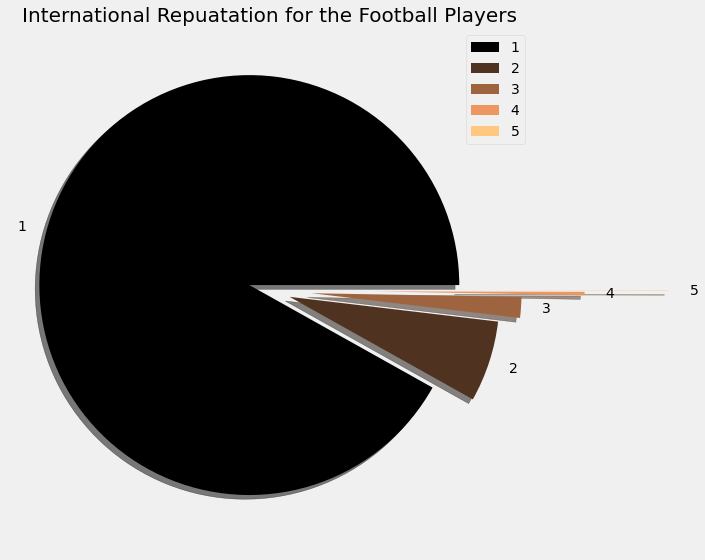

In [ ]:
labels = ['1', '2', '3', '4', '5']
sizes = df['international_reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

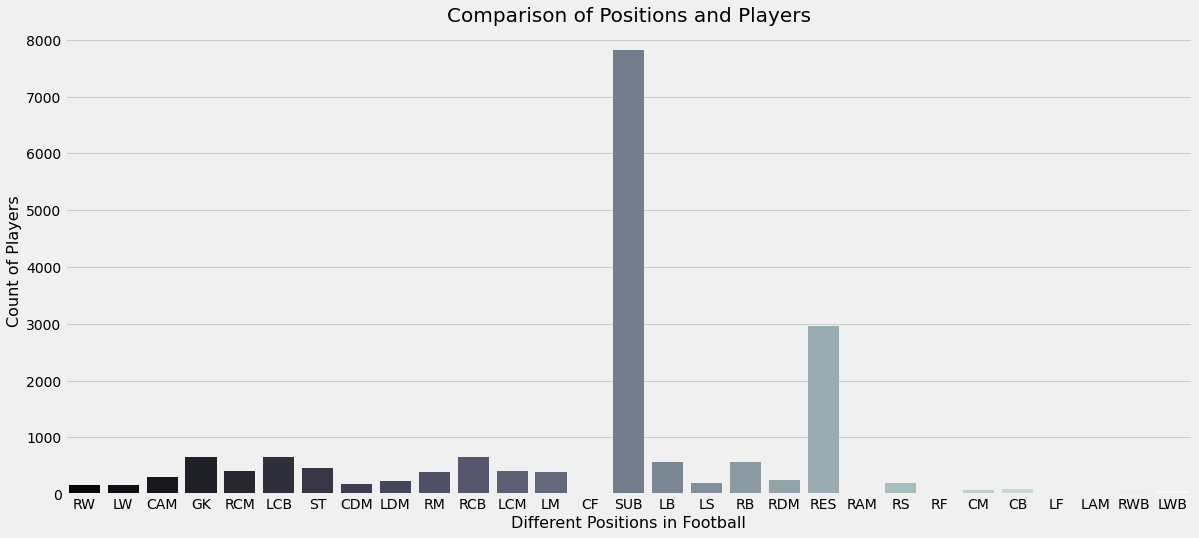

In [ ]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x=df.team_position, data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

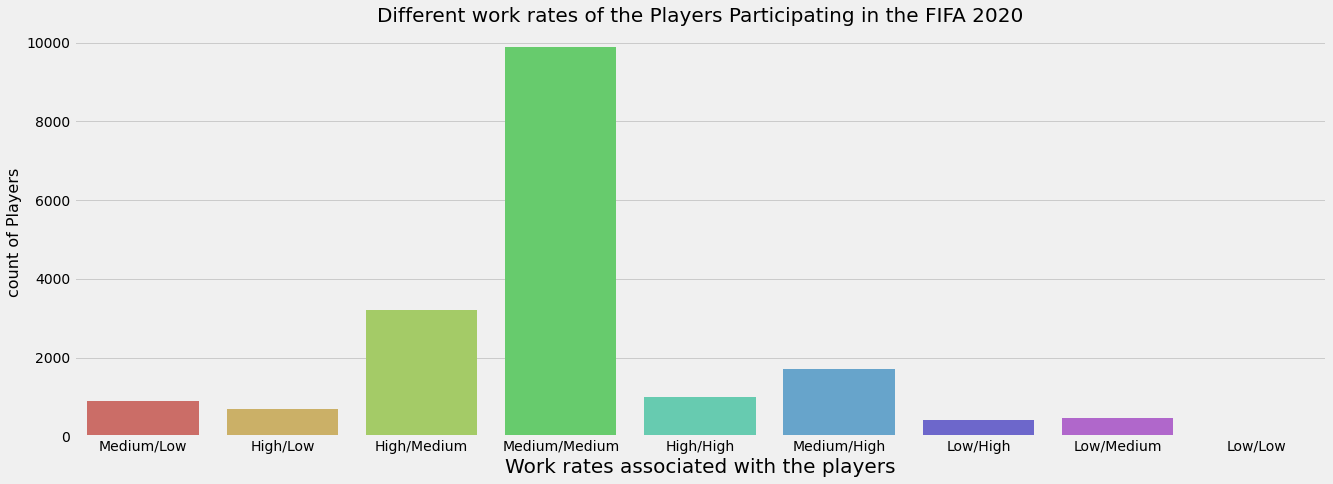

In [ ]:
plt.figure(figsize = (20, 7))

sns.countplot(x = 'work_rate', data = df, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2020', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 20)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

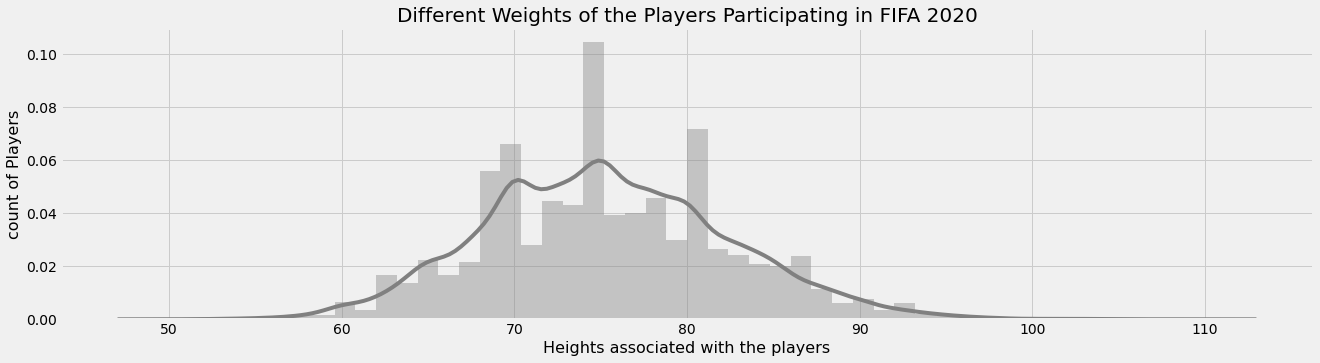

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(df['weight_kg'], color = 'gray')
plt.title('Different Weights of the Players Participating in FIFA 2020', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

**Model Preperation** 

we created the new dataframe rather to drop all columns,we only take that columns which are we needed to us.

In [ ]:
#Consider only needed numeric columns

df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential','value_eur', 'wage_eur', 'international_reputation', 'weak_foot','skill_moves', 'release_clause_eur', 'team_jersey_number','contract_valid_until', 'nation_jersey_number', 'pace', 'shooting','passing', 'dribbling', 'defending', 'physic', 'gk_diving','gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_positioning', 'attacking_crossing','attacking_finishing','attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve','skill_fk_accuracy', 'skill_long_passing','skill_ball_control','movement_acceleration', 'movement_sprint_speed', 'movement_agility','movement_reactions', 'movement_balance', 'power_shot_power','power_jumping', 'power_stamina', 'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties','mentality_composure', 'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes']]


In [ ]:
df = df.fillna(df.mean())
names = df.short_name.tolist() # saving names for later
df = df.drop(['short_name'], axis = 1) # drop the short_name column
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000,10,2021,12,87,92,92,96,39,66,65,63,61,66,37,63,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000,7,2022,7,90,93,82,89,35,78,65,63,61,66,37,63,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000,10,2022,10,91,85,87,95,32,58,65,63,61,66,37,63,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000,13,2023,1,67,52,57,62,51,64,87,92,78,89,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000,7,2024,10,91,83,86,94,35,66,65,63,61,66,37,63,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


**Standardizing data**

In [ ]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_dfa_cols = pd.DataFrame(pca.fit_transform(X_norm))

PCA cols after applying PCA

<Figure size 1800x360 with 0 Axes>

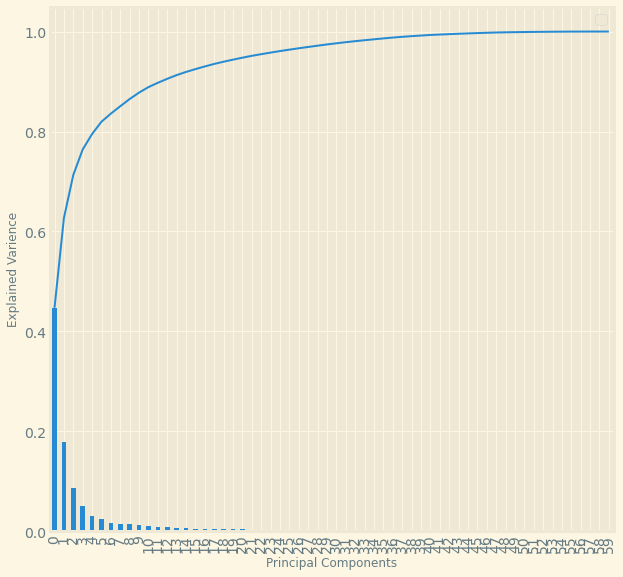

In [ ]:
plt.figure(figsize=(25,5))
# using the style for the plot
plt.style.use('Solarize_Light2')
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # change the color to get better idea
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

 - Choose the columns which can capture the maximum variance. Here 2 or 3 columns would be a better idea because they contain nearly 85% of the variance

In [ ]:
pca_visual = PCA(n_components=2)
projected_cols = pca_visual.fit_transform(X_norm)

In [ ]:
print(f"Before PCA shape {X_norm.shape}")
print(f"After PCA shape {projected_cols.shape}")

Before PCA shape (18278, 60)
After PCA shape (18278, 2)


In [ ]:
df_projected = pd.DataFrame(projected_cols)

In [ ]:
df_projected.head()

,0,1
0,-1.863913,-1.173567
1,-1.721609,-1.061362
2,-1.732120,-1.317057
3,1.847297,-0.286165
4,-1.649182,-1.150018


In [ ]:
df_projected.shape

(18278, 2)

In [ ]:
df_projected["names"] = names

<Figure size 1440x1296 with 0 Axes>

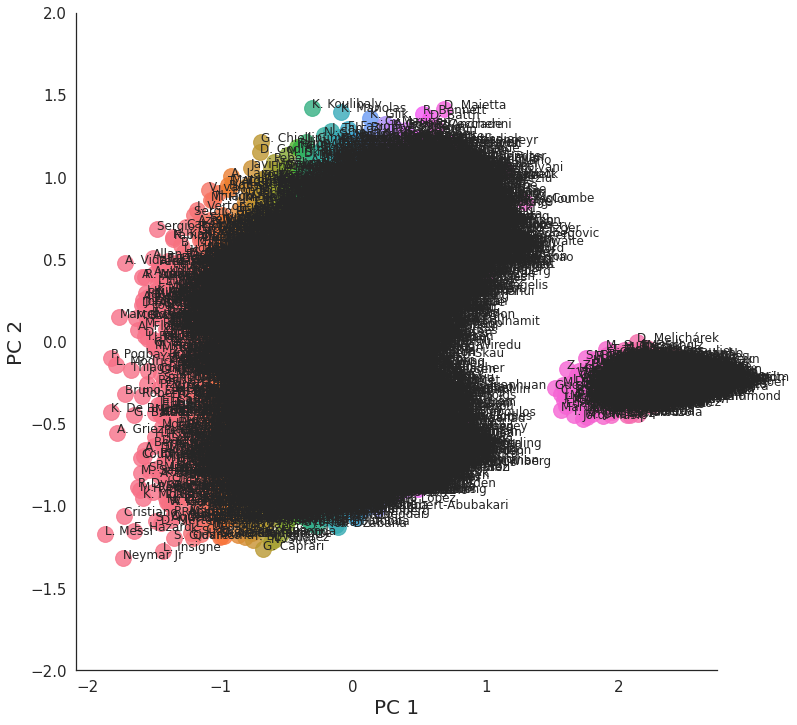

In [ ]:
plt.figure(figsize=(20,18))
df_projected.columns = ['x', 'y', 'name']
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", data = df_projected, legend=False, hue="x",
                   fit_reg=False, height = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_projected.iloc[:, 0], df_projected.iloc[:, 1], df_projected.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

**Apply DBSCAN Algo**

In [ ]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
model = DBSCAN(eps=1, min_samples=5)

# prediction for dbscan clusters
db_clusters = model.fit_predict(projected_cols)

**Make a new data frame by adding players’ names and their cluster**

In [ ]:
df_projected['cluster'] = db_clusters
df_projected.head(10)

,x,y,name,cluster
0,-1.863913,-1.173567,L. Messi,0
1,-1.721609,-1.061362,Cristiano Ronaldo,0
2,-1.732120,-1.317057,Neymar Jr,0
3,1.847297,-0.286165,J. Oblak,1
4,-1.649182,-1.150018,E. Hazard,0
5,-1.821980,-0.428709,K. De Bruyne,0
6,1.752964,-0.290183,M. ter Stegen,1
7,-1.080489,0.918997,V. van Dijk,0
8,-1.781415,-0.139970,L. Modrić,0
9,-1.595577,-0.802245,M. Salah,0


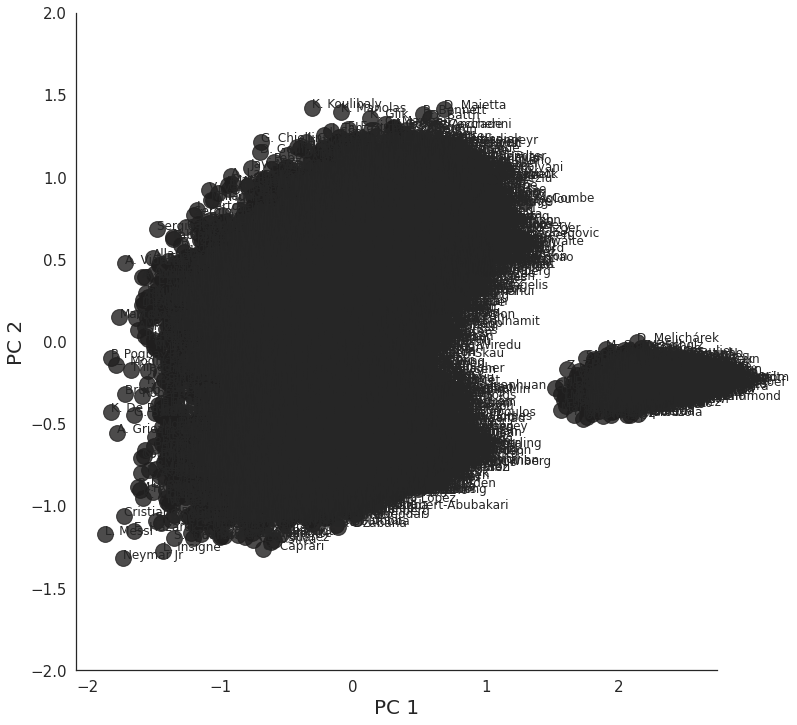

In [ ]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_projected, legend=False,
                   fit_reg=False, size = 10, palette='icefire',scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_projected.x, df_projected.y, df_projected.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

**Plotting DBSCAN**

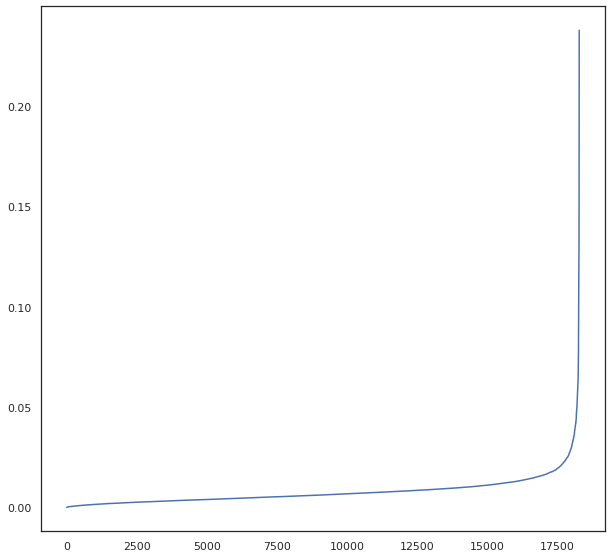

In [ ]:
from sklearn.neighbors import NearestNeighbors

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(projected_cols)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(projected_cols)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

This isnt accurate as it represents goalies v/s rest


**Find an Optimal Epsilon**

In [ ]:
# train the model using DBSCAN
db= DBSCAN(eps=0.3, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(projected_cols)

df_projected['cluster'] = db_clusters
df_projected.head()

,x,y,name,cluster
0,-1.863913,-1.173567,L. Messi,0
1,-1.721609,-1.061362,Cristiano Ronaldo,0
2,-1.732120,-1.317057,Neymar Jr,0
3,1.847297,-0.286165,J. Oblak,1
4,-1.649182,-1.150018,E. Hazard,0


**Apply DBSCAN with new eps** 

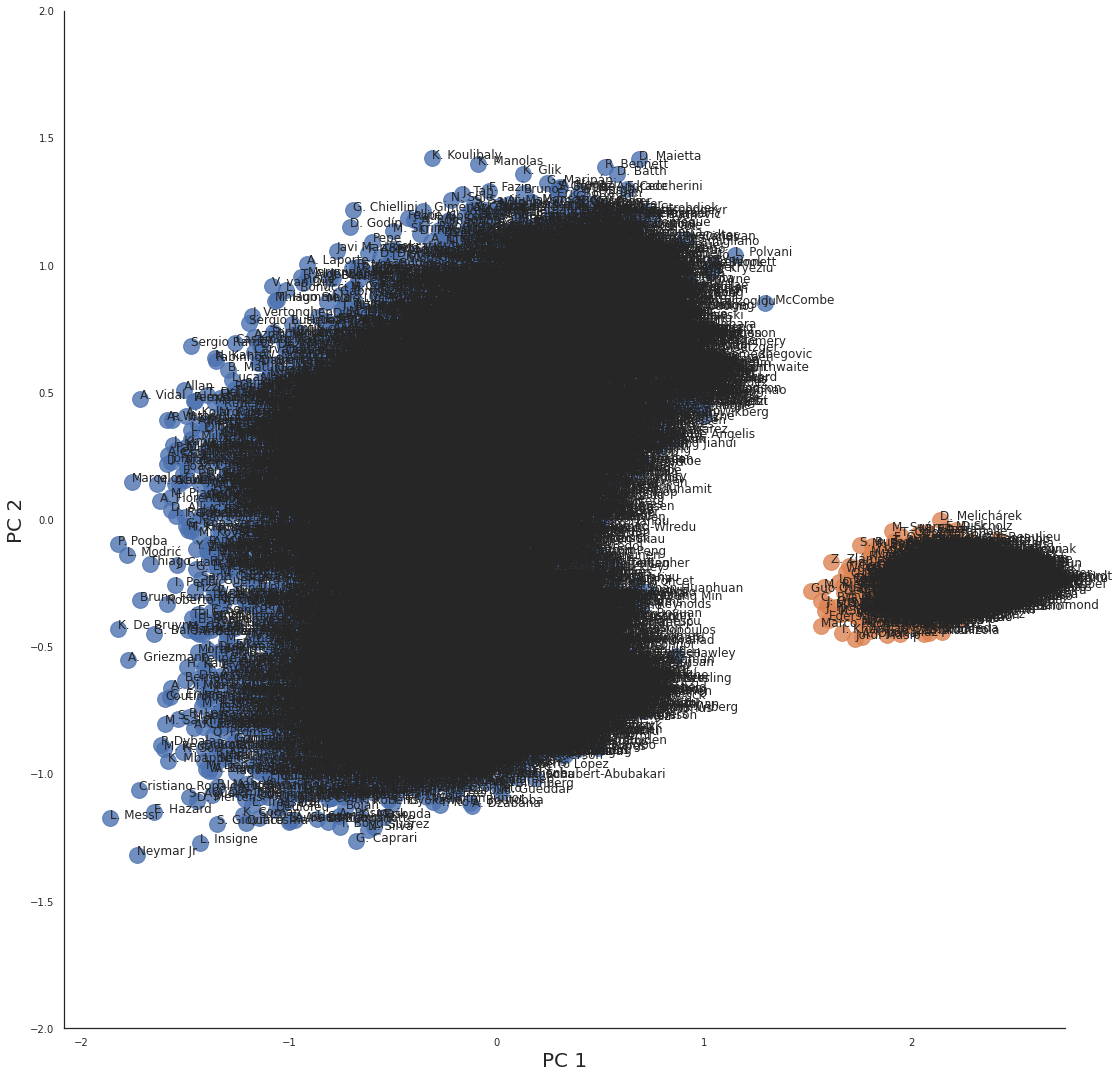

In [ ]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_projected, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(df_projected.x, df_projected.y, df_projected.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

**Plot new and final graph**

we are plotting again with a new optimal Epsilon which we find is 0.3

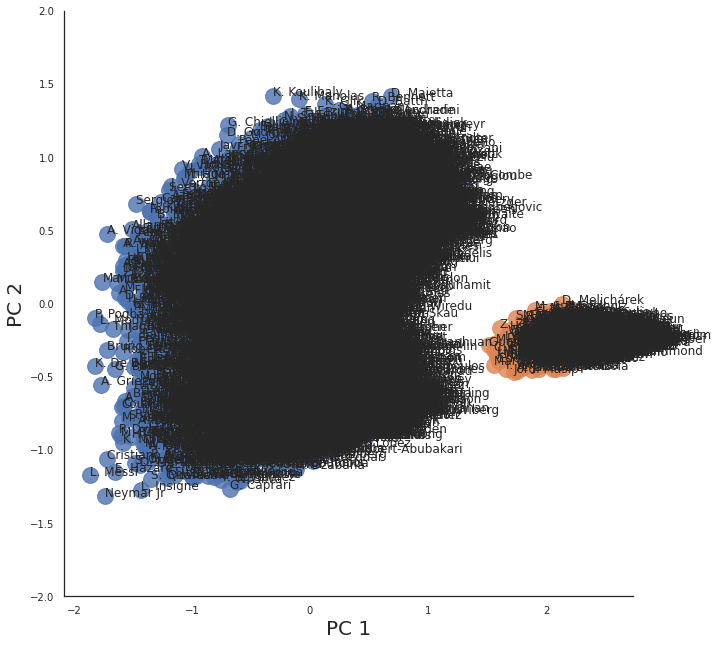

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = df_projected, legend=False,fit_reg=False, size = 9, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(df_projected.x, df_projected.y, df_projected.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()

# **CONCLUSION:**

We discovered that money has a significant impact on a club's performance. Real Madrid, FC Barcelona, and Manchester City are all willing to spend a lot more money on their players.
After the age of 27, a large number of football players chose not to continue their careers. This is a harsh figure that illustrates the fierce competition in this field. However, there were players that were over 40 years old.


The heatmap depicts each position's requirements:

Center Defenders: Strong physicality to avoid being crushed by strikers.

Defenders on the side (wing): Good defence and dribbling skills. You are the one who must put an end to the counterparts and begin your assault.

Good dribbling and passing skills are required for centre midfielders to keep the team connected together. 

Midfielders on the side: Good passing and shooting ability would be advantageous. You're a fantastic striker's assistance.

Wingers are defined as players that have good shooting skills and can move quickly. From the side, you are the assailant.

Good dribbling and shooting skills are required for the centre forward position. When it comes to crushing the defenders in the air, good physique can sometimes give you an extra advantage!